# Importing packages

In [12]:
library(Synth)

# Importing the dataset

In [2]:
data <- read.csv("https://tinyurl.com/ss154-final")
data$adj_national_income <- as.numeric(data$adj_national_income)
head(data)

,id,country,year,gdp_per_capita,million_population,cpi,exchange_rate,land_area,tourism_expenditures,exports_percentage,labor_force,national_expenditures_percentage,capital_formulation,capital_formulation_percentage,adj_national_income,trade_percentage,unemployment,urban_pop_percentage,urban_pop
,<int>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,Argentina,1986,3607.821,30.75760,-0.1,0.000094,2736690,9.738351,8.161978,1281793,98.16208,5.20e+10,17.46176,9.75e+10,14.48603,3.80,85.445,26272907
2,1,Argentina,1987,3559.219,31.21467,0.8,0.000214,2736690,11.651680,7.873206,13075206,99.70256,5.18e+10,19.55487,9.69e+10,15.44897,4.68,85.843,26797140
3,1,Argentina,1988,3982.444,31.67315,0.3,0.000875,2736690,13.905003,9.531613,13349351,96.68023,6.60e+10,18.64004,1.11e+11,15.74346,7.95,86.233,27327921
4,1,Argentina,1989,2382.561,32.12968,0.5,0.042334,2736690,16.011237,13.058409,13417468,93.52114,8.88e+10,15.51470,6.19e+10,19.63780,4.92,86.613,27859735
5,1,Argentina,1990,4330.959,32.58085,-0.6,0.487589,2736690,18.325249,10.359537,13631248,94.27178,9.01e+10,13.99698,1.20e+11,14.99086,5.23,86.984,28389540
6,1,Argentina,1991,5730.724,33.02855,-1.2,0.953554,2736690,20.057398,7.675043,13851438,98.40296,7.90e+10,14.63698,1.67e+11,13.75305,5.44,87.328,28910601


# Synthetic control analysis

In [3]:
treated_unit <- "Australia"
control_units <- c("Argentina", "Brazil", "Denmark", "Japan", "Korea", "Malaysia", "Mexico", "New Zealand", "Singapore", "South Africa", "Sweden", "Switzerland", "United Kingdom")
left_out <- c("capital_formulation_percentage",  "urban_pop_percentage")
dataprep.out <-
    dataprep(foo = data,
             predictors = c("million_population", "cpi", "exchange_rate",
                            "land_area", "tourism_expenditures", "exports_percentage", "labor_force", 
                            "national_expenditures_percentage", "capital_formulation", 
                            "adj_national_income", "trade_percentage", "unemployment", "urban_pop") ,
             predictors.op = "mean" ,
             time.predictors.prior = 1986:2000 ,
             dependent = "gdp_per_capita",
             unit.variable = "id",
             unit.names.variable = "country",
             time.variable = "year",
             treatment.identifier = treated_unit,
             controls.identifier = control_units,
             time.optimize.ssr = 1986:2000,
             time.plot = 1986:2005
    )

## Weight matrix of countries

In [4]:
synth.out <- synth(data.prep.obj = dataprep.out)
synth.tables <- synth.tab(dataprep.res = dataprep.out,
                          synth.res = synth.out
)
synth.tables$tab.w[1:13, ]


X1, X0, Z1, Z0 all come directly from dataprep object.


**************** 
 searching for synthetic control unit  
 

**************** 
**************** 
**************** 

MSPE (LOSS V): 2265698 

solution.v:
 0.001870811 0.1041782 0.1815164 1.608e-07 2.378e-07 8.197e-07 9.01e-08 0.3760402 0.3285852 5.56e-08 2.2654e-06 2.6208e-06 0.007802964 

solution.w:
 0.008674273 0.002396656 0.003636231 0.003151093 0.00283234 0.001636045 0.002428389 0.4722266 0.003770895 0.005607059 0.02044498 0.008176882 0.4650186 



,w.weights,unit.names,unit.numbers
,<dbl>,<chr>,<int>
1,0.009,Argentina,1
3,0.002,Brazil,3
4,0.004,Denmark,4
5,0.003,Japan,5
6,0.003,Korea,6
7,0.002,Malaysia,7
8,0.002,Mexico,8
9,0.472,New Zealand,9
10,0.004,Singapore,10


### Variable balance between treated unit and synthetic control

In [5]:
synth.tables$tab.pred[1:13, ]

,Treated,Synthetic,Sample Mean
million_population,1.760000e+01,3.046300e+01,4.566300e+01
cpi,4.123000e+00,5.762000e+00,6.161200e+01
exchange_rate,1.405000e+00,4.223000e+00,7.968200e+01
land_area,7.682300e+06,3.028956e+05,1.233402e+06
tourism_expenditures,1.003500e+01,1.067400e+01,7.584000e+00
exports_percentage,1.719800e+01,2.744700e+01,4.024900e+01
labor_force,8.783416e+06,1.520689e+07,2.060971e+07
national_expenditures_percentage,1.012830e+02,1.012670e+02,9.762700e+01
capital_formulation,3.903333e+10,3.892668e+10,1.660744e+11
adj_national_income,2.586000e+11,5.255083e+11,4.824979e+11


# Path and Gaps plot

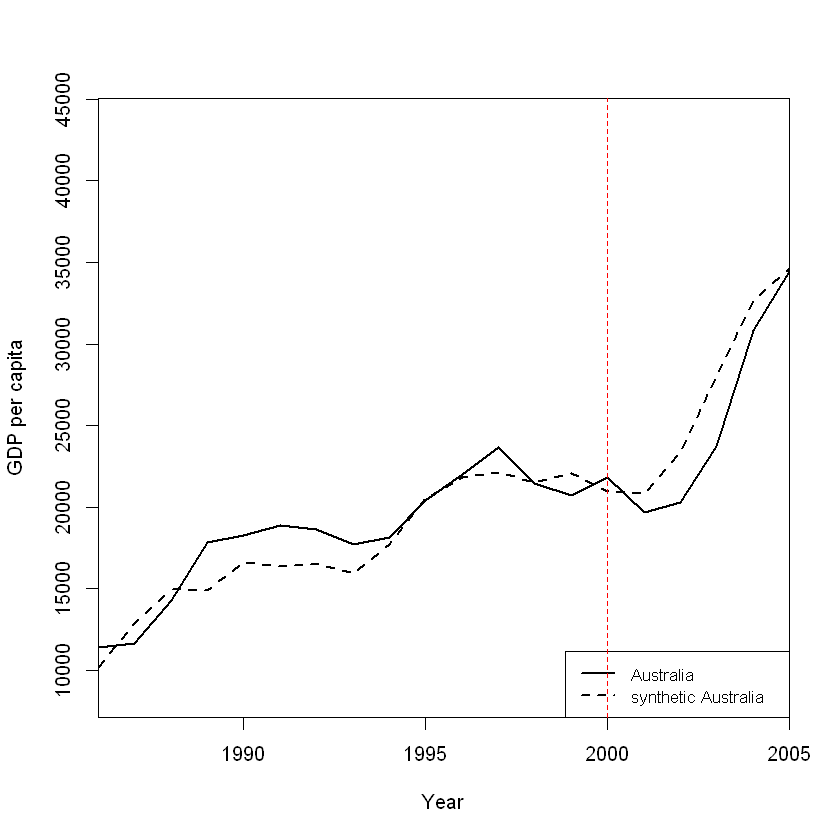

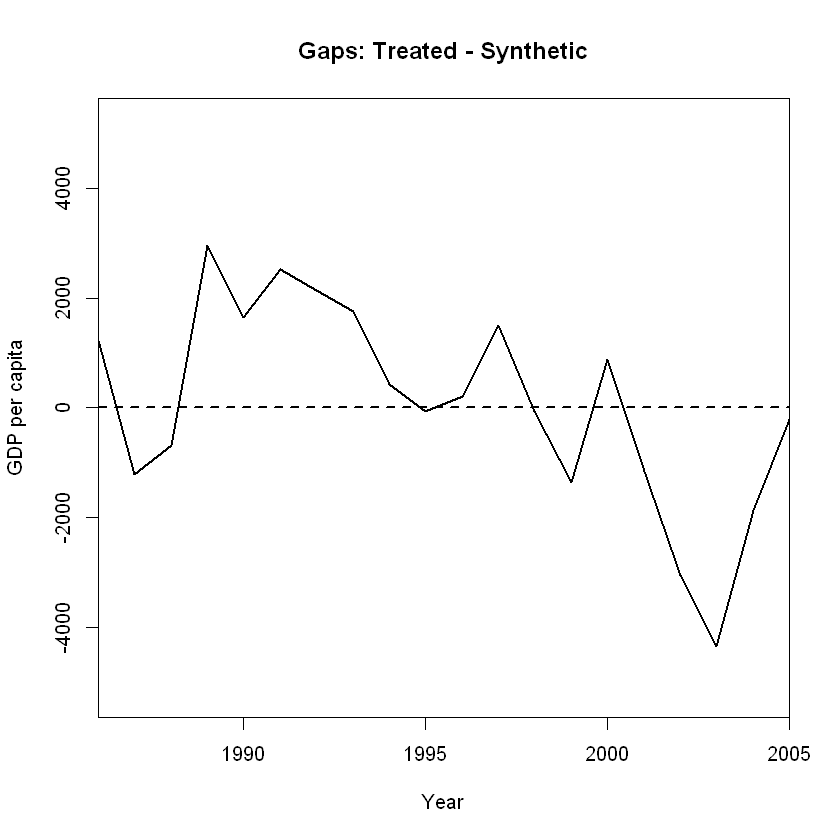

In [6]:
path.plot(synth.res = synth.out,
          dataprep.res = dataprep.out,
          Ylab = "GDP per capita",
          Xlab = "Year",
          Legend = c("Australia","synthetic Australia"),
          Legend.position = "bottomright"
)
# Add line for year = 2000 in the plot
abline(v = 2000, lty = 2, col = "red")
gaps.plot(synth.res = synth.out,
          dataprep.res = dataprep.out,
          Ylab = "GDP per capita",
          Xlab = "Year",
)

## Table showing weights of variables to outcome prediction

In [7]:
synth.tables$tab.v

v.weights
million_population               0.002    
cpi                              0.104    
exchange_rate                    0.182    
land_area                        0        
tourism_expenditures             0        
exports_percentage               0        
labor_force                      0        
national_expenditures_percentage 0.376    
capital_formulation              0.329    
adj_national_income              0        
trade_percentage                 0        
unemployment                     0        
urban_pop                        0.008

# Measurement of gaps between treated unit and synthetic control at each year

In [11]:
gaps <- (dataprep.out$Y1plot - (dataprep.out$Y0plot%*%synth.out$solution.w))
mean(gaps[15:20, ])

[1] -1617.342

# Robustness tests

### In-place placebo


X1, X0, Z1, Z0 all come directly from dataprep object.


**************** 
 searching for synthetic control unit  
 

**************** 
**************** 
**************** 

MSPE (LOSS V): 8104434 

solution.v:
 0.05882433 0.05160584 0.05621015 0.2156805 0.1717478 0.05694398 0.02818541 0.0008203401 0.0001861408 0.1395087 0.02692491 0.1170112 0.0763507 

solution.w:
 0.1391456 8.3e-07 0.3030295 2.8452e-06 0.0001012799 1.381e-06 1.2823e-06 0.1165853 8.896e-07 1.0901e-06 0.4181996 0.0229304 



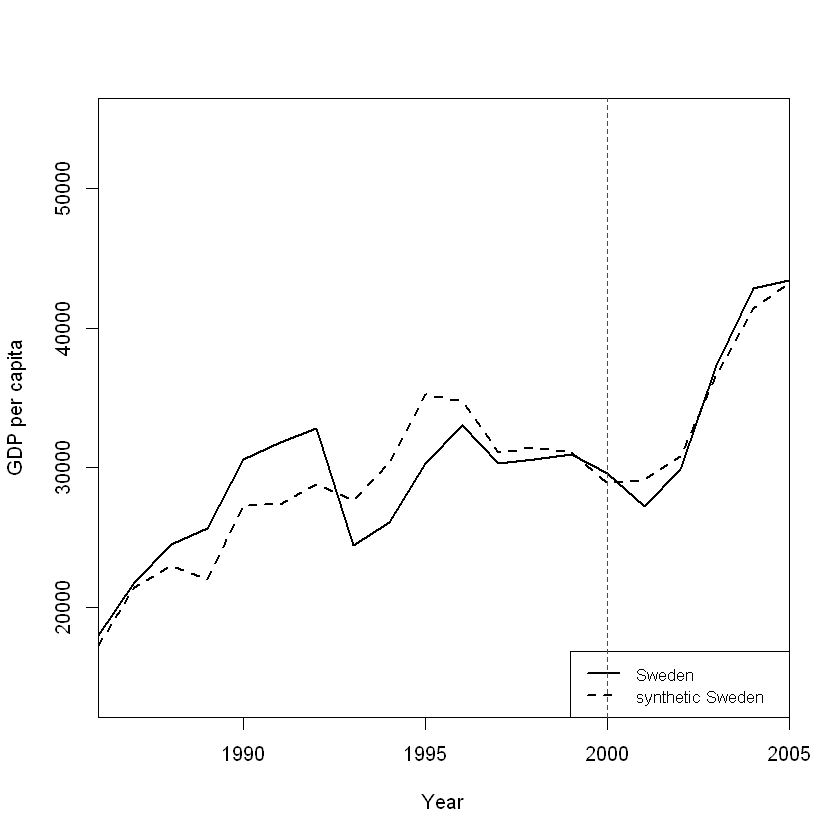

In [9]:
treated_unit <- "Sweden"
control_units <- c("Argentina","Brazil", "Denmark", "Japan", "Korea", "Malaysia",  "Mexico", "New Zealand", "Singapore","South Africa", "Switzerland", "United Kingdom")
dataprep.out.sweden <-
    dataprep(foo = data,
             predictors = c("million_population", "cpi", "exchange_rate",
                            "land_area", "tourism_expenditures", "exports_percentage", "labor_force", 
                            "national_expenditures_percentage", "capital_formulation", 
                            "adj_national_income", "trade_percentage", "unemployment", "urban_pop") ,
             predictors.op = "mean" ,
             time.predictors.prior = 1986:2000 ,
             dependent = "gdp_per_capita",
             unit.variable = "id",
             unit.names.variable = "country",
             time.variable = "year",
             treatment.identifier = treated_unit,
             controls.identifier = control_units,
             time.optimize.ssr = 1986:2000,
             time.plot = 1986:2005
    )
synth.out.sweden <- synth(data.prep.obj = dataprep.out.sweden)
path.plot(synth.res = synth.out.sweden,
          dataprep.res = dataprep.out.sweden,
          Ylab = "GDP per capita",
          Xlab = "Year",
          Legend = c("Sweden","synthetic Sweden"),
          Legend.position = "bottomright"
)
# Add line for year = 2000 in the plot
abline(v = 2000, lty = 2, col = "red")

### In-time placebo tests


X1, X0, Z1, Z0 all come directly from dataprep object.


**************** 
 searching for synthetic control unit  
 

**************** 
**************** 
**************** 

MSPE (LOSS V): 1155690 

solution.v:
 4.964e-07 0.0290801 0.01535669 0.0003707878 0.7842064 5.273e-07 1.4177e-06 0.0564572 1.4084e-05 0.04700631 0.006772869 0.05270007 0.008033039 

solution.w:
 0.002046015 0.004674388 0.001344786 0.000571094 0.005231499 5.8131e-06 0.05292125 0.2086643 0.0008240092 0.1403902 0.3192493 0.001196414 0.2628809 



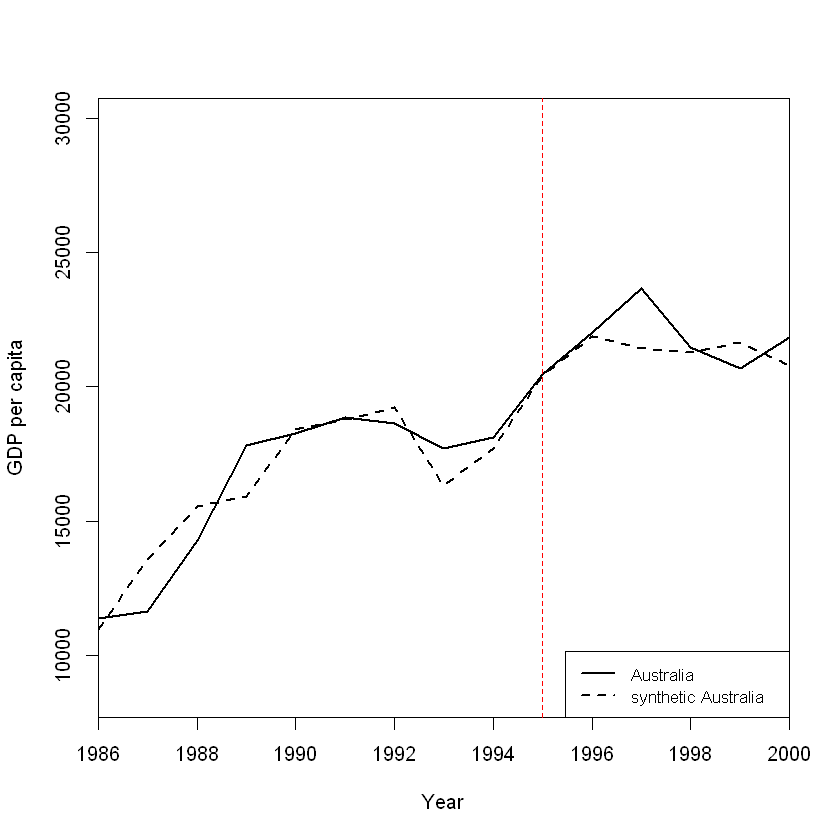

In [10]:
treated_unit <- "Australia"
control_units <- c("Argentina","Brazil", "Denmark", "Japan", "Korea", "Malaysia",  "Mexico", "New Zealand", "Singapore", "South Africa", "Sweden", "Switzerland", "United Kingdom")
dataprep.out.1995 <-
    dataprep(foo = data,
             predictors = c("million_population", "cpi", "exchange_rate",
                            "land_area", "tourism_expenditures", "exports_percentage", "labor_force", 
                            "national_expenditures_percentage", "capital_formulation", 
                            "adj_national_income", "trade_percentage", "unemployment", "urban_pop") ,
             predictors.op = "mean" ,
             time.predictors.prior = 1986:1995 ,
             dependent = "gdp_per_capita",
             unit.variable = "id",
             unit.names.variable = "country",
             time.variable = "year",
             treatment.identifier = treated_unit,
             controls.identifier = control_units,
             time.optimize.ssr = 1986:1995,
             time.plot = 1986:2000
    )
synth.out.1995 <- synth(data.prep.obj = dataprep.out.1995)
path.plot(synth.res = synth.out.1995,
          dataprep.res = dataprep.out.1995,
          Ylab = "GDP per capita",
          Xlab = "Year",
          Legend = c("Australia","synthetic Australia"),
          Legend.position = "bottomright"
)
# Add line for year = 2000 in the plot
abline(v = 1995, lty = 2, col = "red")